## Neural Networks for Joint Sentence Classification in Medical Paper Abstracts



PubMed 200k RCT1, a new
dataset based on PubMed for sequential
sentence classification. The dataset consists
of approximately 200,000 abstracts
of randomized controlled trials, totaling
2.3 million sentences. Each sentence of
each abstract is labeled with their role in
the abstract using one of the following
classes: background, objective, method,
result, or conclusion.

Our problem is to classify the sentences according to the label as specify in the paper.

We will try to replicate the paper architecture and code it into TensorFlow.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# Download the dataset

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# Check what files are in the PubMed_20K dataset 
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
# Create function to read the lines of a document
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# Read Sentences

train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

### From the above sentences you can see clearly how our dataset is look like.
### Now we try to build a model to classify each sentence to its desired class.

# Preprocess the Text

So what we are going to do?
We are going to make a function in which returns a dataframe with line_no, target variable, sentence and total lines in each label class like



STEPS:


1)If line begins with ### it means that it is the ID of starting paragraph 
related to a specific class we just have to skip that line and start counting the lines in paragraph.

2)if line begins with \n it means that line is ended keep the total count of line in paragraph.

3) Label of para is before \t and after it the sentence starts.

Return a dictionary with having line_no,target,text and total_lines







In [ ]:
def preprocess_text(filename):
  abstract_lines = ""
  abstract_samples = []
  input_lines =  get_lines(filename)

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""

    elif line.isspace():
      abstract_lines_split = abstract_lines.splitlines()
      for line_no, abstract_line in enumerate(abstract_lines_split):
        line_data = {}
        target_text = abstract_line.split('\t')
        line_data['target'] = target_text[0]
        line_data['text'] = target_text[1]
        line_data['line_number'] = line_no+1
        line_data['total_lines'] = len(abstract_lines_split)
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples



In [ ]:
train_samples = preprocess_text(data_dir+'train.txt')
test_samples = preprocess_text(data_dir+'test.txt')
val_samples = preprocess_text(data_dir+'dev.txt')

In [ ]:
# make dataframes 

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)


In [ ]:
train_df.head(10)

,target,text,line_number,total_lines
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,1,12
1,METHODS,A total of @ patients with primary knee OA wer...,2,12
2,METHODS,Outcome measures included pain reduction and i...,3,12
3,METHODS,Pain was assessed using the visual analog pain...,4,12
4,METHODS,Secondary outcome measures included the Wester...,5,12
5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",6,12
6,RESULTS,There was a clinically relevant reduction in t...,7,12
7,RESULTS,The mean difference between treatment arms ( @...,8,12
8,RESULTS,"Further , there was a clinically relevant redu...",9,12
9,RESULTS,These differences remained significant at @ we...,10,12


In [ ]:
train_sent = train_df['text'].tolist()
test_sent = test_df['text'].tolist()
val_sent = val_df['text'].tolist()

In [ ]:
train_sent[:10]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic

In [ ]:
# Encoding for label
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse=False)

train_labels = one_hot.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_labels = one_hot.transform(test_df['target'].to_numpy().reshape(-1,1))
val_labels = one_hot.transform(val_df['target'].to_numpy().reshape(-1,1))

In [ ]:
train_labels[:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

# Analyze Data

In [ ]:
print("Train\n ",train_df['target'].value_counts())
print("\nTest\n ",test_df['target'].value_counts())
print("\nVal\n ",val_df['target'].value_counts())


Train
  METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

Test
  METHODS        9897
RESULTS        9713
CONCLUSIONS    4571
BACKGROUND     3621
OBJECTIVE      2333
Name: target, dtype: int64

Val
  METHODS        9964
RESULTS        9841
CONCLUSIONS    4582
BACKGROUND     3449
OBJECTIVE      2376
Name: target, dtype: int64


In [ ]:
# Total Sentences 

print('Train',len(train_sent))
print('Test',len(test_sent))
print('Val',len(val_sent))

Train 180040
Test 30135
Val 30212


In [ ]:
# Generate WordCloud which gives us the most occuring words
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(text):
  stopwords = set(STOPWORDS)
  sentences = ""
  for sent in text:
    tokens  = sent.lower().split()
    sentences += " ".join(tokens)


  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(sentences)

  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

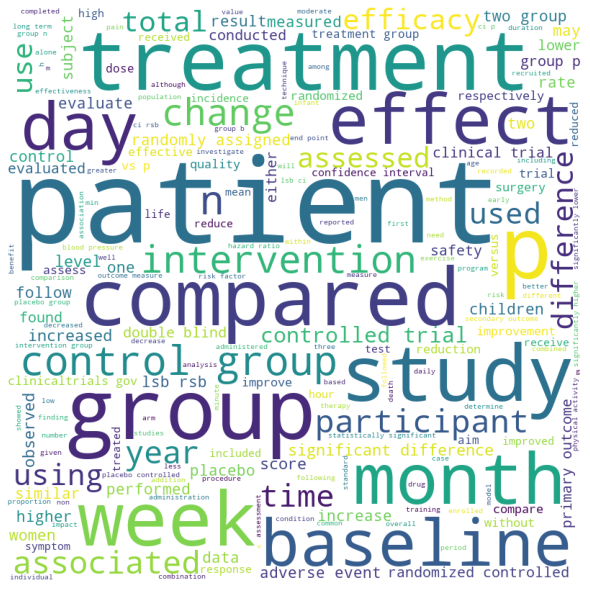

In [ ]:
generate_wordcloud(train_sent)

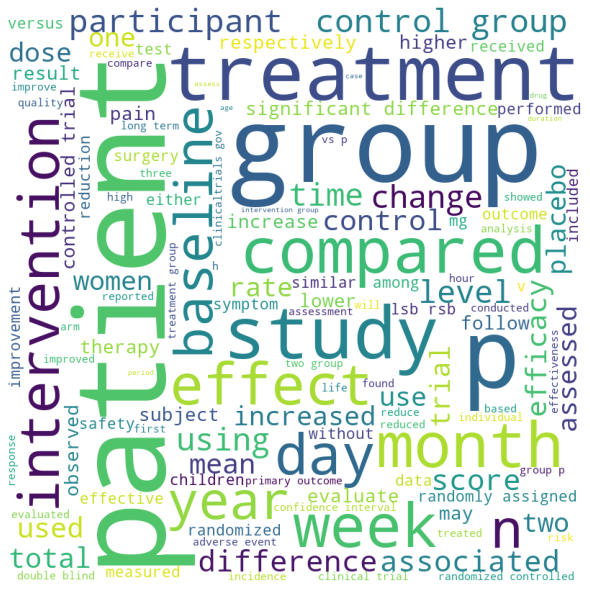

In [ ]:
generate_wordcloud(test_sent)

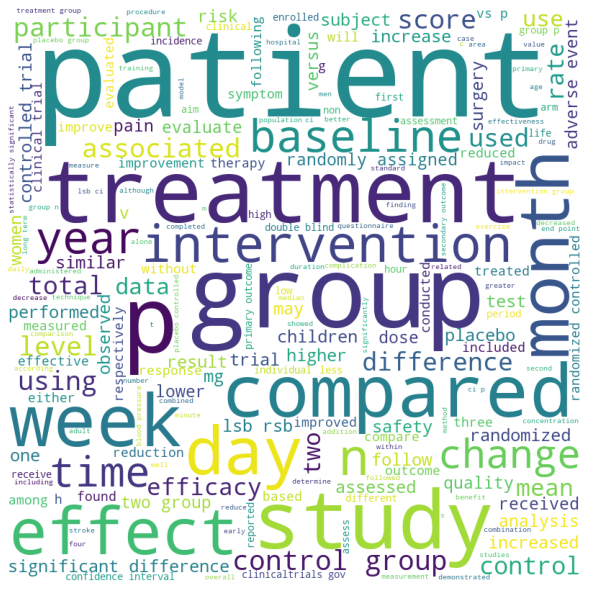

In [ ]:
generate_wordcloud(val_sent)

In [ ]:
# Frequency of words 

In [ ]:
# average len of a sentence in corpus
sent_lens = [len(sentence.split()) for sentence in train_sent]
avg_len = np.mean(sent_lens)
avg_len

26.338269273494777

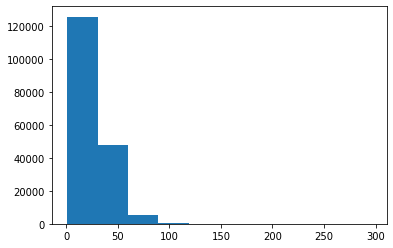

In [ ]:
# Sentences length are lie between 0-50 mostly 
plt.hist(sent_lens)
plt.show()

### We can check the Length of sentence that covers most of sentence length by calculating its percentile

In [ ]:
np.percentile(sent_lens,98)

68.0

98% of the sentences are below and equal to 68 words

# Model Architecture

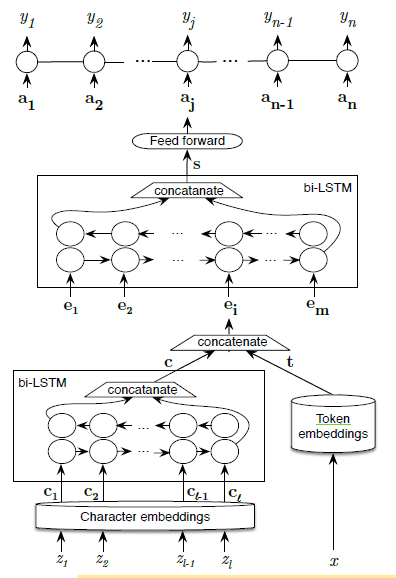

### Create Token Embeddings

In [ ]:
# Use pretrained model for Token Embeddings


import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
tf_hub_embedding_layer([train_sent[0]])[:10]

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-4.90380228e-02,  5.24623543e-02,  3.95998769e-02,
        -6.31776378e-02, -7.30676949e-02,  6.28731549e-02,
         3.52799073e-02, -6.18203953e-02,  5.71083054e-02,
         4.63245288e-02,  7.16570392e-02,  2.51986017e-03,
        -9.52070765e-03,  6.51003094e-03,  3.80008891e-02,
         3.74654010e-02, -7.96469226e-02,  6.41185716e-02,
         3.50537375e-02, -3.88272889e-02,  1.50759863e-02,
        -1.20223025e-02,  1.47859305e-02, -2.70261113e-02,
         1.51410364e-02,  5.35053983e-02, -6.14337577e-03,
        -3.47358249e-02, -7.48624578e-02,  2.86217057e-03,
        -5.25581725e-02,  7.89910182e-02,  7.17563331e-02,
         1.59457736e-02, -6.31276295e-02,  1.22191282e-02,
        -1.35266157e-02, -3.82611118e-02, -1.69011764e-02,
        -6.66884333e-02, -4.18503881e-02,  7.29317144e-02,
        -1.60358846e-02, -5.26477359e-02,  6.90131262e-02,
         6.53062165e-02, -3.43542323e-02, -3.79559621e-02,
      

### Create Character Vectorizer for Embedding

In [ ]:
train_chars = [' '.join(text) for text in train_sent]
test_chars = [' '.join(text) for text in test_sent]
val_chars = [' '.join(text) for text in val_sent]


In [ ]:
train_chars[:10]

['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
 'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'O u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sent]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

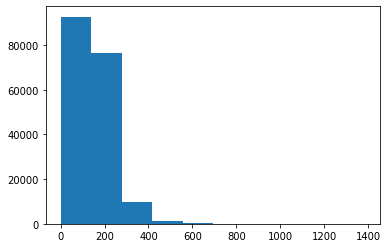

In [ ]:
# Distribution of chars

plt.hist(char_lens)
plt.show()

In [ ]:
# The value which define 98 percent of characters

output_seq_len = np.percentile(char_lens,98)
output_seq_len

347.0

347 is the value which we can use as our output vector length for our TextVectorizer

So now what is the input Sequence Length?



In [ ]:
import string
aplha_num = string.ascii_lowercase+string.digits+string.punctuation
aplha_num

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
input_token_char_len = len(aplha_num)+2 # here 2 is for space and OOV (out of vocabulary) tokens
input_token_char_len

70

# OOV:
Out-of-vocabulary (OOV) are terms that are not part of the normal lexicon found in a natural language processing environment. 

Simply means that it doesn't exist in Vocabulary

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
char_vectorizer = TextVectorization(max_tokens=input_token_char_len, 
                                    output_sequence_length=int(output_seq_len),
                                    name="char_vectorizer")

# Adapt the vectorizer
char_vectorizer.adapt(train_chars)

In [ ]:
# Check vocabulary
char_vocab_size = len(char_vectorizer.get_vocabulary())
print('length of vocabulary: ',char_vocab_size)

length of vocabulary:  28


In [ ]:
rand_sent_chars = np.random.choice(train_chars)
print("Vectorized chars",char_vectorizer([rand_sent_chars]))

Vectorized chars tf.Tensor(
[[ 4  6 14  5  3  4  2  6  3  9 20  4  3 13  5  6  4  6 11  8  2  5  9  2
   4  6  2 10  9  9  7 17  7  8 10 16  8  4  6 18  8  2 12  5 14  9  2  6
   5  3  5 12  4 25 16 15  5 22  4  6 11  8  2  5  9  2 10  3 13  2 14  8
   7 22  5 22  4 12  4  3 19  7 17 20  2  2 23 11  7  6 17  4  8 15  2 10
  11  7 15 14 12  2  3  2  8  2 11  7 21  2  8 19 17  8  7 15  8  2 12  5
  14  9  2 22 19 13  5 25  5  8 10  8  5  3  4  7 12  9 22 13  8  8  9 22
  14  5  6 10 13  8 14 11  7 15 14  5  8  2 10  3  7 14 12  5 11  2 22  7
   8  2  9 14  2 11  3  4 21  2 12 19  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0

### Create Char Level Embedding

In [ ]:
embed_char_layer =  tf.keras.layers.Embedding(input_dim=char_vocab_size,
                                               output_dim=25, # Specify in paper
                                               name='char_embedding'
                                               ) 


In [ ]:
print("Characters in sentence: ",rand_sent_chars)
print("\nCharacter Vectorizer: ",char_vectorizer([rand_sent_chars]))
print("\nCharacter Embedding: ", embed_char_layer(char_vectorizer([rand_sent_chars])))

Characters in sentence:  I n   p a t i e n t s   w i t h   a n   i n c r e a s e   i n   E D S S   o f   @   o r   @   d u r i n g   r e l a p s e   ,   n a t a l i z u m a b   i n c r e a s e d   t h e   p r o b a b i l i t y   o f   @ - w e e k   c o n f i r m e d   c o m p l e t e   r e c o v e r y   f r o m   r e l a p s e   b y   @   %   (   h a z a r d   r a t i o   - L S B -   H R   - R S B -   =   @   ;   P   =   @   )   a n d   @   %   (   H R   =   @   ;   P   =   @   )   c o m p a r e d   t o   p l a c e b o   ,   r e s p e c t i v e l y   .

Character Vectorizer:  tf.Tensor(
[[ 4  6 14  5  3  4  2  6  3  9 20  4  3 13  5  6  4  6 11  8  2  5  9  2
   4  6  2 10  9  9  7 17  7  8 10 16  8  4  6 18  8  2 12  5 14  9  2  6
   5  3  5 12  4 25 16 15  5 22  4  6 11  8  2  5  9  2 10  3 13  2 14  8
   7 22  5 22  4 12  4  3 19  7 17 20  2  2 23 11  7  6 17  4  8 15  2 10
  11  7 15 14 12  2  3  2  8  2 11  7 21  2  8 19 17  8  7 15  8  2 12  5
  14  9  2 22 19 13  5 25  5  8 10  

So now we will implement model architecture proposed in the paper

# Model

In [ ]:
# Token Embedding denoted as t in Neural Networks for Joint Sentence Classification in Medical Paper Abstracts paper

token_inputs = tf.keras.layers.Input(shape=[],dtype=tf.string, name="token_input") 
token_embedding = tf_hub_embedding_layer(token_inputs)
token_output= tf.keras.layers.Dense(300,activation="relu")(token_embedding)
token_model = tf.keras.Model(inputs=token_inputs,outputs=token_output)

# Charater Embedding denoted as c in Neural Networks for Joint Sentence Classification in Medical Paper Abstracts paper

char_inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string,name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embedding = embed_char_layer(char_vectors)
bilstm_output = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25))(char_embedding)
char_model = tf.keras.Model(inputs=char_inputs,outputs=bilstm_output)

# Hybrid Token Embedding denoted as e

hybrid_tokens = tf.keras.layers.Concatenate(name="hybrid_tokens")([token_model.output,char_model.output])

# Sentence Vector denoted as s
dense_1 = tf.keras.layers.Dense(200,activation="relu")(hybrid_tokens)

# Regularization value is specified in the paper
drop_out_1 = tf.keras.layers.Dropout(0.5)(dense_1)
dense_2 = tf.keras.layers.Dense(100,activation="relu")(drop_out_1)
dense_3 = tf.keras.layers.Dense(100,activation="relu")(dense_2)
output_layer = tf.keras.layers.Dense(5,activation="softmax")(dense_3)

model = tf.keras.Model(inputs=[token_model.input,char_model.input],outputs=output_layer,name="model_token_char")

In [ ]:
model.summary()

Model: "model_token_char"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 347)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_input[0][0

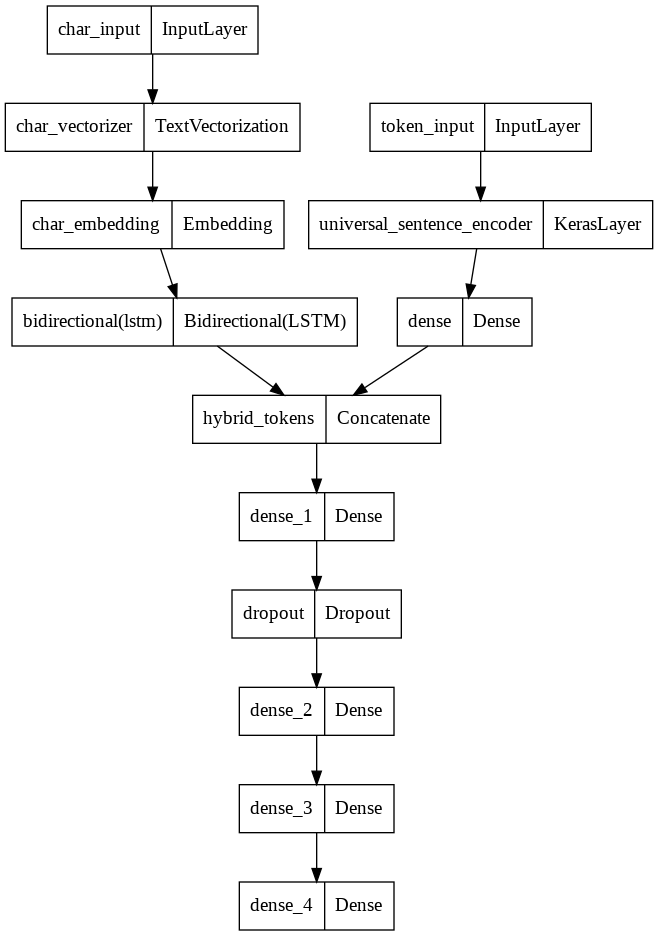

In [ ]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer=tf.optimizers.SGD(),loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])

### Training

In [ ]:
# Combine Tokens and Chars into a single dataset

train_char_tokens = tf.data.Dataset.from_tensor_slices((train_sent,train_chars))
train_char_tokens_labels = tf.data.Dataset.from_tensor_slices(train_labels)

# combine label and data
train_char_tokens_dataset = tf.data.Dataset.zip((train_char_tokens, train_char_tokens_labels)) 

#define batch_size 
train_char_tokens_dataset =  train_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# For Validation set

val_char_tokens = tf.data.Dataset.from_tensor_slices((val_sent,val_chars))
val_char_tokens_labels = tf.data.Dataset.from_tensor_slices(val_labels)

# combine label and data
val_char_tokens_dataset = tf.data.Dataset.zip((val_char_tokens, val_char_tokens_labels)) 
#define batch_size 
val_char_tokens_dataset =  val_char_tokens_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
history = model.fit(train_char_tokens_dataset,
          epochs=10,
          validation_data=val_char_tokens_dataset
          )

Epoch 1/10
5627/5627 [==============================] - 208s 36ms/step - loss: 1.1486 - accuracy: 0.5272 - val_loss: 0.8418 - val_accuracy: 0.6510
Epoch 2/10
5627/5627 [==============================] - 197s 35ms/step - loss: 0.8399 - accuracy: 0.6610 - val_loss: 0.7736 - val_accuracy: 0.6969
Epoch 3/10
5627/5627 [==============================] - 198s 35ms/step - loss: 0.7742 - accuracy: 0.7014 - val_loss: 0.7162 - val_accuracy: 0.7281
Epoch 4/10
5627/5627 [==============================] - 198s 35ms/step - loss: 0.7277 - accuracy: 0.7226 - val_loss: 0.6819 - val_accuracy: 0.7409
Epoch 5/10
5627/5627 [==============================] - 203s 36ms/step - loss: 0.6958 - accuracy: 0.7363 - val_loss: 0.6592 - val_accuracy: 0.7508
Epoch 6/10
5627/5627 [==============================] - 204s 36ms/step - loss: 0.6711 - accuracy: 0.7460 - val_loss: 0.6380 - val_accuracy: 0.7580
Epoch 7/10
5627/5627 [==============================] - 197s 35ms/step - loss: 0.6528 - accuracy: 0.7526 - val_loss: 0

In [ ]:
# Evaluate the model

model.evaluate(val_char_tokens_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.6014 - accuracy: 0.7711


[0.6013839244842529, 0.7710512280464172]

In [ ]:
'he'

'he'

In [ ]:
# Predicted Probabilty

predicted_prob = model.predict(val_char_tokens_dataset)
predicted_prob

array([[5.9214824e-01, 2.2984657e-01, 9.0097729e-04, 1.7404939e-01,
        3.0548433e-03],
       [3.9651242e-01, 4.9232051e-01, 2.6393640e-03, 1.0726635e-01,
        1.2613353e-03],
       [4.8825660e-01, 1.3882539e-02, 1.8501431e-02, 4.7630763e-01,
        3.0517362e-03],
       ...,
       [1.5770730e-04, 1.9094289e-03, 1.8399945e-02, 7.4416406e-05,
        9.7945857e-01],
       [3.5172258e-02, 2.2191586e-01, 1.7469116e-01, 1.3688649e-02,
        5.5453205e-01],
       [4.6273086e-02, 9.4308370e-01, 3.1151588e-03, 1.3651322e-03,
        6.1628376e-03]], dtype=float32)

In [ ]:
predictions = tf.argmax(predicted_prob,axis=1)
predictions

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 0, ..., 4, 4, 1])>

In [ ]:
# Plot the validation and training data separately
def plot_loss(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

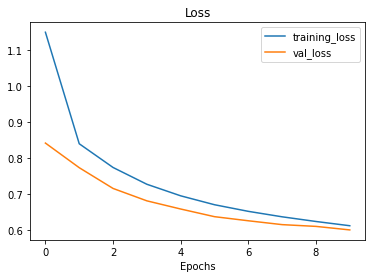

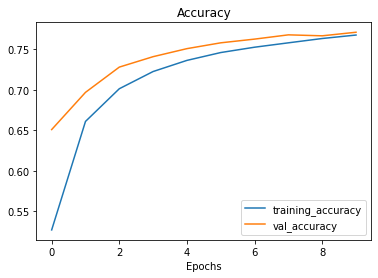

In [ ]:
plot_loss(history)